In [2]:
from IPython.display import Markdown, display
display(Markdown("header.md"))

<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> AI Booster Week 02 - Python for Data Science </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         Paris | © Antoine SCHERRER
    </span>
</div>

Please make sure you have a working installation of Jupyter Notebook / Jupyter Lab, with Python 3.6+ up and running.

## Naming conventions

Since we will implement functions that are already available in python standard library or other libraries, you will have to *prefix* every function with `msds_` prefix.

For instance, the function implementing the `mean` function should be named `msds_mean`.

For every function you write, **you will need to write a test function** that should be named `test_[function_name]`.

For instance, the test function for `msds_mean` will be: `test_msds_mean`.

**don't forget to document all you function with Python docstring**

For instance:
```
def msds_my_awesome_function():
    """
    This function computes an awesome function
    """
    # Awesome code
    ...
```

All function should be in snake case (no Camel case!)

When creating classes, then follow these rules:
 - class names should be in camel case
 - method names should be in snake case
 - attribute names should be in snake case

## Exercise's difficulty

Every exercise will be prefixed with an indication of its difficulty:
 - [easy]: easy exercise, should be pretty straightforward for you
 - [moderate]: intermediate level exercise, you all should manage to solve them
 - [advanced]: for advanced students who want to go deeper/further

**Advanced exercises are not mandatory.**

## Required libraries

These are the libraries we will use (to check our computations for instance), you need to install them in your virtual environment:

 - `pandas`: data manipulation library
 - `scipy`: scientific library in Python
 - `numpy`: vector/matrix computations
 - `statistics`: statistics library
 - `matplotlib`: plotting lib
 - `seaborn`: alternative plotting lib (based on matplotlib)
 - `jupyter_black`: plugin for jupyter to allow `black` (code formatter) to run
 - `unittest`: testing library 




# Session 05 - Linear algebra

In [3]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")
from pprint import pprint
import jupyter_black

jupyter_black.load()

## Vectors

We will perform some computation on vectors.

### [easy] define a class that will represent a vector

Store dimensionality (size) of the vector as attribute
 - implement methods computing some norms of the vector:
     - L1 $\sum_i | x_i |$
     - L2 $\sqrt{\sum_i x_i ^ 2 }$
 - Implement `normalize_l2` method to normalize the vector with l2 norm
 - Implement `normalize_l1` method to normalize the vector with l1 norm
 - Implement `normalize_softmax` method to normalize the vector using softmax function
 - Implement `__str__` and `__repr__` method to pretty print vector

**Use typing to define expected types for parameters and return values.**

### [moderate] implement some computations on 2 vectors

 - `add`: computes the sum of 2 vectors (in place, accumulate)
 - `dot`: computes the dot product of 2 vectors, returns the value
 - `distance_euclidian`: Euclidean distance of 2 vectors, returns the value
 - `manhattan_distance`: Manhattan distance of 2 vectors, returns the value
 - `cosine_similarity`: Cosine similarity of 2 vectors, returns the value

In [39]:
from typing import List, Union

Number = Union[int, float]


class MsdsVector:
    """
    This class represents a vector in a N-dimentinal space :
    """

    def __init__(self, data: List[Number]) -> None:
        print("This is building a MsdsVector object")
        print(data)
        self.data = data
        self.size = len(data)

    @property  # 装饰器，只读属性
    def norm_l1(self) -> Number:
        return sum(abs(x) for x in self.data)

    @property
    def norm_l2(self) -> Number:
        return math.sqrt(sum(x**2 for x in self.data))

    def normalize_l2(self) -> None:
        l2_norm = self.norm_l2
        if l2_norm == 0:
            return [0] * self.size
        normalized_vector = [x / l2_norm for x in self.data]
        self.data = normalized_vector

        # norm = self.norm_l2
        # normalized_data = []
        # for e in self.data:
        #     normalized_data.append(e / norm)
        # self.data = normalized_data

    def normalize_l1(self) -> None:
        l1_norm = self.norm_l1
        if l1_norm == 0:
            return [0] * self.size
        normalized_vector = [x / l1_norm for x in self.data]
        self.data = normalized_vector

    def normalize_softmax(self) -> None:
        """
        Normalize the vector using softmax function.
        """
        exp_data = [math.exp(x) for x in self.data]
        sum_exp_data = sum(exp_data)
        normalized_vector = [x / sum_exp_data for x in exp_data]
        self.data = normalized_vector

    def add(self, v: MsdsVector) -> None:  # use zip
        if self.size != v.size:
            raise ValueError("Vectors must have the same dimensionality")
        self.data = [x + y for x, y in zip(self.data, v.data)]

    def dot(self, v: "MsdsVector") -> Number:
        if self.size != v.size:
            raise ValueError("Vectors must have the same dimensionality")
        return sum(x * y for x, y in zip(self.data, v.data))

    def distance_euclidian(self, v: MsdsVector) -> Number:
        return math.sqrt(sum([(x - y) ** 2 for x, y in zip(self.data, v.data)]))

    def manhattan_distance(self, v: MsdsVector) -> Number:
        return sum(abs(x - y) for x, y in zip(self.data, v.data))

    def cosine_similarity(self, v: "MsdsVector") -> Number:
        if self.size != v.size:
            raise ValueError("Vectors must have the same dimensionality")
        dot_product = self.dot(v)
        norm_self = self.norm_l2
        norm_other = v.norm_l2
        if norm_self == 0 or norm_other == 0:
            return 0  # Avoid division by zero
        cosine_similarity = dot_product / (norm_self * norm_other)
        return cosine_similarity

    def __str__(self):
        """
        Pretty print the vector.
        """
        vector_str = ", ".join(str(x) for x in self.data)
        return f"Vector ({len(self.data)}-D): [{vector_str}]"
        return f"Vector ({self.dimension}-D): {self.data}"

    def __repr__(self):
        return str(self)

    def get(self, index: int) -> Number:
        return self.data[index]


def test_msds_vector():
    v = MsdsVector([1, 2, 3])
    assert len(v.data) == 3, f"{len(v.data)}, 5"
    assert v.norm_l1 == 6, f"{v.norm_l1}, 5"
    assert v.norm_l2 == 14**0.5, f"{v.norm_l2}, 14**0.5"
    v.normalize_l2()
    assert v.norm_l2 == 1, f"{v.norm_l2}, 1"
    v.normalize_l1()
    assert v.norm_l1 == 1, f"{v.norm_l2}, 1"
    v.normalize_softmax()
    assert v.norm_l1 == 1, f"{v.norm_l1}, 1"
    v = MsdsVector([1, 2, 3])
    v.add(MsdsVector([1, 2, 3]))
    assert v.get(1) == 4, f"{v.get(1)}, 2"
    v = MsdsVector([1, 2, 3])
    d = v.distance_euclidian(MsdsVector([2, 3, 4]))
    assert d == math.sqrt(3), f"{v.get(1)}, 2"
    d = v.manhattan_distance(MsdsVector([2, 3, 4]))
    assert d == 3, f"{d}, 3"
    d = v.cosine_similarity(MsdsVector([2, 3, 4]))
    assert abs(d - 0.9925833339709303) < 1e-5, f"{v.get(1)}, 2"


test_msds_vector()

This is building a MsdsVector object
[1, 2, 3]
This is building a MsdsVector object
[1, 2, 3]
This is building a MsdsVector object
[1, 2, 3]
This is building a MsdsVector object
[1, 2, 3]
This is building a MsdsVector object
[2, 3, 4]
This is building a MsdsVector object
[2, 3, 4]
This is building a MsdsVector object
[2, 3, 4]


## Matrices


### [easy] define a class that will represent a matrix

Store dimensionality (size) of the matrix as attribute (rows and columns numbers)
 - implement methods computing some quantities:
     - flatten (returns a list of all values in a single list)
     - maximum value
 - implement a method to create an identity matrix of size $n$x$m$

### [moderate] implement matrix/vector multiplication

Write a method that multiplies a vector by a matrix, and a method that multiplies a matrix by a vector!

### [moderate] implement matrix/matrix multiplication

Write a method that multiplies a matrix by another matrix

In [ ]:
class MsdsMatrix:
    pass


def test_msds_matrix():
    m = MsdsMatrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    print(m)
    assert m.columns == 3
    assert m.rows == 3
    assert m.get(0, 0) == 1
    assert len(m.flatten()) == 9
    assert m.max() == 9

    zeros = MsdsMatrix(rows=4, cols=5)
    assert zeros.columns == 5
    assert zeros.rows == 4
    assert sum([sum(x) for x in zeros.data]) == 0

    ident = MsdsMatrix(rows=4, cols=5)
    ident.identity()
    assert ident.columns == 5
    assert ident.rows == 4
    assert sum([sum(x) for x in ident.data]) == 4.0

    v_m1 = m.vmul_pre(MsdsVector([1, 2, 1]))

    assert v_m1.size == 3
    assert v_m1.get(0) == 16
    assert v_m1.get(1) == 20
    assert v_m1.get(2) == 24

    v_m2 = m.vmul_post(MsdsVector([1, 2, 1]))
    print(v_m2)
    assert v_m2.size == 3
    assert v_m2.get(0) == 8
    assert v_m2.get(1) == 20
    assert v_m2.get(2) == 32


test_msds_matrix()

## [moderate] Implementing a simple perceptron

Instead of using our class, we will rely on numpy to make these computations.

The idea will be to code the execution of a **perceptron** neural network (the simplest kind of those!).

You can check details on the wikipedia page:
https://en.wikipedia.org/wiki/Perceptron

Given a vector of $n$ weights $\mathbf{w}$, and input vector $\mathbf{x}$ (with $n$ values) and a scalar bias $b$, compute the output $f(x)$ defined as:

${\displaystyle f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}}$


In [ ]:
def msds_perceptron(x, w, b):
    """
    Compute a simple perceptron
    """
    return np.dot(w, x) + b > 0


def test_msds_perceptron():
    w = [1, 0.5, 2]
    b = -0.5
    assert msds_perceptron(np.array([0.1, 4, 3]), w, b) == 1
    assert msds_perceptron(np.array([-2, -4, -3]), w, b) == 0


test_msds_perceptron()

## [advanced] Training a simple perceptron

Now let's fit a perceptron using some data!

We will follow the steps from this tutorial:
https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428








In [41]:
from sklearn.datasets import load_iris

data = load_iris()
data.data  # 特征
# data.target

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
     0    1    2    3  4
0  5.1  3.5  1.4  0.2  0
1  4.9  3.0  1.4  0.2  0
2  4.7  3.2  1.3  0.2  0
3  4.6  3.1  1.5  0.2  0
4  5.0  3.6  1.4  0.2  0
#### EPOCH 0
[[1.  3.5 0.2]]
[[1.  3.  0.2]]
[[1.  3.2 0.2]]
[[1.  3.1 0.2]]
[[1.  3.6 0.2]]
[[1.  3.9 0.4]]
[[1.  3.4 0.3]]
[[1.  3.4 0.2]]
[[1.  2.9 0.2]]
[[1.  3.1 0.1]]
[[1.  3.7 0.2]]
[[1.  3.4 0.2]]
[[1.  3.  0.1]]
[[1.  3.  0.1]]
[[1.  4.  0.2]]
[[1.  4.4 0.4]]
[[1.  3.9 0.4]]
[[1.  3.5 0.3]]
[[1.  3.8 0.3]]
[[1.  3.8 0.3]]
[[1.  3.4 0.2]]
[[1.  3.7 0.4]]
[[1.  3.6 0.2]]
[[1.  3.3 0.5]]
[[1.  3.4 0.2]]
[[1.  3.  0.2]]
[[1.  3.4 0.4]]
[[1.  3.5 0.2]]
[[1.  3.4 0.2]]
[[1.  3.2 0.2]]
[[1.  3.1 0.2]]
[[1.  3.4 0.4]]
[[1.  4.1 0.1]]
[[1.  4.2 0.2]]
[[1.  3.1 0.1]]
[[1.  3.2 0.2]]
[[1.  3.5 0.2]]
[[1.  3.1 0.1]]
[[1.  3.  0.2]]
[[1

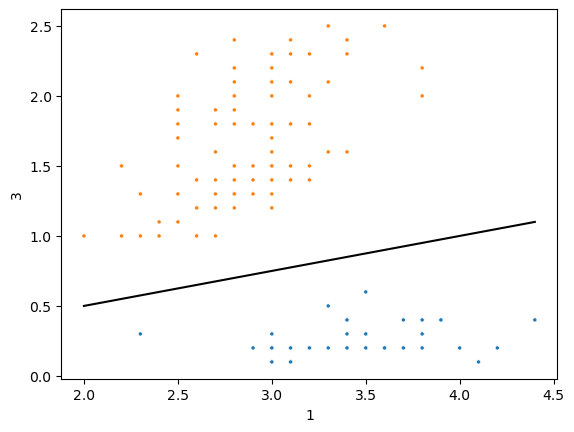

In [48]:
def msds_perceptron(data, num_iter):
    features = data[:, :-1]
    classes = data[:, -1]
    w = np.zeros(shape=(1, features.shape[1] + 1))
    misclasstified_ = []
    for epoch in range(num_iter):
        print(f"#### EPOCH {epoch}")
        misclasstified = 0
        for f, cls in zip(features, classes):
            f = np.insert(f, 0, 1.0)
            y = np.dot(f, w.T)
            target = 1.0 if (y > 0) else 0.0
            print(f)
            delta = cls[0, 0] - target
            if delta:
                # delta is not 0
                w += delta * f
        misclasstified_.append(misclasstified)
    return w, misclasstified_


def test_msds_perceptron_fit():
    iris = pd.read_csv("data/iris.csv", header=None)
    # 0: SepalWidth
    # 1: SepalLength
    # 2: PetalWidth
    # 3: PetalLength
    # 4: Class
    print(iris.head())
    # Change class te be with 0/1
    iris[4] = np.where(iris.iloc[:, -1] == "Iris-setosa", 0, 1)
    print(iris.head())
    cls = iris[4]
    iris = iris.drop(columns=[0, 2])
    data = np.asmatrix(iris, dtype="float64")
    num_iter = 100
    w, misclassified_ = msds_perceptron(data, num_iter)
    print(f"Weights: {w}")
    weights = w[0]
    x = iris[1]
    y = iris[3]
    sb.scatterplot(x=x, y=y, marker=".", hue=cls, legend=None)
    # The Line is y=mx+c
    #
    # w0 + w1.x + w2.y = 0
    # y = -w0/w2 - w1x/w2
    X_th = np.array([min(x), max(x)])
    m = -weights[1] / weights[2]
    c = -weights[0] / weights[2]
    Y_th = m * X_th + c
    sb.lineplot(x=X_th, y=Y_th, color="k")


test_msds_perceptron_fit()